In [1]:
import sys
import os
from os.path import join

project_root = os.path.dirname(os.path.abspath('..')) 

if project_root not in sys.path:
    sys.path.append(project_root)

from src.NeuralNetwork import NeuralNetwork
from src.layers import ConvolutionalLayer, FlattenLayer, \
                       DenseLayer, MaxPoolingLayer, ReLULayer, \
                       SigmoidLayer, SoftmaxLayer, ResidualBlock, BatchNormalizationLayer
from data.MnistDataloader import MnistDataloader
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
input_path = '../../data/input'
training_images_filepath = join(input_path, '../../data/mnist/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, '../../data/mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, '../../data/mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, '../../data/mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
x_train = np.expand_dims(np.array(x_train), axis=1)
y_train = np.expand_dims(np.array(y_train), axis=1)
x_test = np.expand_dims(np.array(x_test), axis=1)
y_test = np.expand_dims(np.array(y_test), axis=1)

In [6]:
x_train = x_train.astype('float64') / 255.0
x_test = x_test.astype('float64') / 255.0

print(f"train: {x_train.shape}")
print(f"test: {x_test.shape}")

train: (60000, 1, 28, 28)
test: (10000, 1, 28, 28)


In [7]:
print(f"train: {y_train.shape}")
print(f"test: {y_test.shape}")

train: (60000, 1)
test: (10000, 1)


In [8]:
old_y_train = y_train
old_y_test = y_test

y_train = np.zeros((10, old_y_train.shape[0]))
y_test = np.zeros((10, old_y_test.shape[0]))

In [9]:
y_train.shape

(10, 60000)

In [10]:
for idx, value in enumerate(old_y_train):
  y_train[value, idx] = 1
  
for idx, value in enumerate(old_y_test):
  y_test[value, idx] = 1

In [11]:
x_train.shape[0]

60000

In [2]:
import pickle

def save_model(layers, filename="model.pkl"):
  with open(filename, "wb") as f:
      pickle.dump(layers, f)
  print(f"Model saved to {filename}")
  
def load_model(filename="model.pkl"):
    with open(filename, "rb") as f:
        return pickle.load(f)

In [10]:
layers = [
    ConvolutionalLayer(name="Conv1", next_act_layer="relu", output_channels_dim=32),
    ReLULayer(name="ReLU1"), 
    MaxPoolingLayer(name="Maxpool1"),

    ConvolutionalLayer(name="Conv2", next_act_layer="relu", output_channels_dim=64),
    ReLULayer(name="ReLU2"), 
    MaxPoolingLayer(name="Maxpool2"),

    FlattenLayer(name="Flatten1"),

    DenseLayer(name="Dense1", next_act_layer="softmax", output_dim=10),
    SoftmaxLayer(name="Softmax1")
]

In [11]:
nn = NeuralNetwork(
  layers = layers,
  loss_type="cce",
  optimizer_type="adam",
  seed=1
)

In [12]:
nn.build((
  x_train.shape[1],
  x_train.shape[2],
  x_train.shape[3]
))

In [ ]:
gamma = 0.95

for epoch in range(7):
  
  lr = 0.1 * np.power(gamma, epoch)
  
  nn.train(
    x_train, 
    y_train, 
    epochs=1, 
    learning_rate=lr, 
    batch_size=256, 
    decrease_after=100, 
    gamma=1
  )
  
  save_model(nn, f"mnist_model_{epoch}.pkl")
  
  y_pred = nn.forward_pass(x_test)
  curr_test_acc = np.mean(y_pred.argmax(axis=0) == y_test.argmax(axis=0))
  
  print(f"Test accuracy for 'mnist_model_{epoch}.pkl': {curr_test_acc}")

Epoch 0, Batch 0: Loss = 15.0350 | Acc = 10.16%
Epoch 0, Batch 1: Loss = 15.3729 | Acc = 14.45%
Epoch 0, Batch 2: Loss = 14.4804 | Acc = 10.94%
Epoch 0, Batch 3: Loss = 12.4352 | Acc = 17.19%
Epoch 0, Batch 4: Loss = 13.0272 | Acc = 18.75%
Epoch 0, Batch 5: Loss = 10.5458 | Acc = 25.00%
Epoch 0, Batch 6: Loss = 8.9443 | Acc = 32.81%
Epoch 0, Batch 7: Loss = 11.2772 | Acc = 20.70%
Epoch 0, Batch 8: Loss = 7.1489 | Acc = 35.55%
Epoch 0, Batch 9: Loss = 6.4926 | Acc = 45.70%
Epoch 0, Batch 10: Loss = 7.9713 | Acc = 42.97%
Epoch 0, Batch 11: Loss = 7.7490 | Acc = 44.14%
Epoch 0, Batch 12: Loss = 6.3421 | Acc = 49.22%
Epoch 0, Batch 13: Loss = 3.6856 | Acc = 51.17%
Epoch 0, Batch 14: Loss = 2.4289 | Acc = 56.25%
Epoch 0, Batch 15: Loss = 4.6089 | Acc = 43.36%
Epoch 0, Batch 16: Loss = 5.9959 | Acc = 34.38%
Epoch 0, Batch 17: Loss = 4.0381 | Acc = 44.14%
Epoch 0, Batch 18: Loss = 3.2306 | Acc = 52.73%
Epoch 0, Batch 19: Loss = 2.8815 | Acc = 60.94%
Epoch 0, Batch 20: Loss = 2.8140 | Acc = 62

In [3]:
mnist_model_0 = load_model("mnist_model_0.pkl")

In [20]:
test_data = np.expand_dims(x_test[45, 0, :, :], axis=(0, 1))
test_label = y_test[:, 45]

np.int64(5)

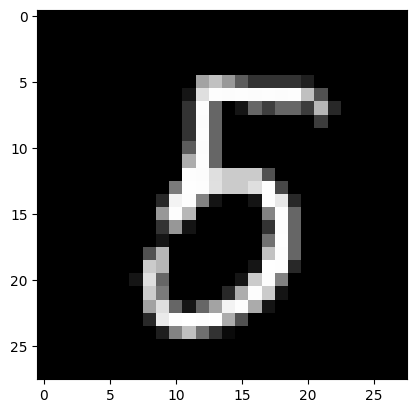

In [21]:
plt.imshow(test_data[0][0], cmap=plt.cm.gray)
test_label.argmax()

In [22]:
y_pred = mnist_model_0.forward_pass(test_data)

In [23]:
y_pred.argmax()

np.int64(5)

In [63]:
idx = range(y_test.shape[1])
rand_idx = np.random.choice(idx, size=5000)

y_pred = mnist_model_0.forward_pass(x_test[rand_idx, :, :, :])

In [64]:
np.mean(y_pred.argmax(axis=0) == y_test[:, rand_idx].argmax(axis=0))

np.float64(0.8892)